In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

2025-03-14 23:00:18.490981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741993218.536821   49752 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741993218.547444   49752 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1741993218.568100   49752 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741993218.568123   49752 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1741993218.568126   49752 computation_placer.cc:177] computation placer alr

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dapat Anda lihat pada dataframe di atas bahwa terdapat kolom id yang tidak ada hubungan dengan label sehingga kita perlu membuang kolom tersebut. Untuk membuang kolom dari dataframe, kita dapat menggunakan fungsi drop(). Fungsi ini berguna untuk menghapus kolom sesuai dengan kebutuhan model.

In [3]:
df = df.drop(columns='Id')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Mengubah kolom kategori menjadi Numerik

Karena pada kasus ini label kita merupakan data kategorikal mari kita pelajari salah satu metode transformasi lainnya, yaitu one hot encoding menggunakan fungsi get_dummies(). Fungsi ini memungkinkan mengubah setiap variabel dalam menjadi angka sebanyak nilai yang berbeda. Kolom pada output masing-masing diberi nama sesuai dengan nilai. Jika inputnya berupa DataFrame, nama variabel asli akan ditambahkan ke nilai tersebut sebagai nama kolom.

In [6]:
category = pd.get_dummies(df.Species, dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Kemudian, kita perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena sudah ada variabel baru dan tidak akan terpakai lagi. 

In [7]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Setelah selesai mengolah dataframe, kita harus melakukan konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe. 

In [8]:
dataset = new_df.values

Nah, pada tahap berikutnya, kita perlu memisahkan atribut dan label agar model neural network dapat mempelajari pola dari berbagai data dan hubungannya dengan label yang telah ditentukan.

In [ ]:
# Memilih Kolom untuk dijadikan atribut atau variabel independen
X = dataset[:,0:4]
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
# Menentukan variabel yang ingin ditarget atau variabel dependen
y = dataset[:, 4:7]

Tahap berikutnya yang **cukup krusial dan sering terlupakan adalah normalisasi**. Kita perlu melakukan normalisasi agar data dapat dipelajari dengan baik oleh model neural network. Pada modul sebelumnya, kita telah berhasil melakukan normalisasi pada dataset buah-buahan. Yup, hal yang sama perlu kita lakukan pada data yang ada pada kasus ini.



In [18]:
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Sesudah itu lakukan pembagian data menjadi data latih dan data uji. Tidak ada acuan baku untuk pembagian ukuran dataset ini. Tujuan dari pembagian dataset ini untuk membagi data menjadi dua bagian seperti namanya. Biasanya, data dipisahkan menjadi dua bagian, satu bagian digunakan untuk mengevaluasi atau menguji data dan bagian lainnya untuk melatih model. Namun, terdapat metode lain seperti membagi menjadi tiga bagian menjadi data latih, data uji, dan data validasi. Biasanya teknik ini disebut dengan cross validation.



---
Kembali pada kasus yang sedang kita hadapi, lakukanlah pembagian data menjadi data latih dan data uji. Untuk ukuran data testing yang digunakan 30%, tentu Anda dapat bereksperimen menggunakan proporsi pembagian lainnya.



In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

Untuk arsitektur model, kita kali ini menggunakan 3 buah layer. **Activation function yang digunakan pada layer terakhir dipilih softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini**. Jika penasaran terkait softmax lebih detail, silakan membaca kembali pada modul sebelumnya, ya. 



In [20]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax')])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-14 23:09:12.817792: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Lanjutkan dengan menentukan optimizer dan loss function dari model. Untuk masalah klasifikasi multi kelas, Anda dapat menggunakan loss ‘categorical_crossentropy’.



In [21]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Nah, pada latihan ini ada sedikit perubahan yang perlu kita pelajari lagi. Fungsi fit() sekarang kita tampung ke dalam objek hist (history). Untuk apa kita melakukan hal ini? Temukan jawabannya di materi berikutnya, ya.

In [22]:
hist = model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3611 - loss: 1.1077  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3549 - loss: 1.0700 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5123 - loss: 1.0414 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6167 - loss: 1.0082 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6465 - loss: 0.9865 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6826 - loss: 0.9548 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6722 - loss: 0.9193 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6809 - loss: 0.8930 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6875 - loss: 0.8660 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6861 - loss: 0.8289 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7125 - loss: 0.7940 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6715 - lo

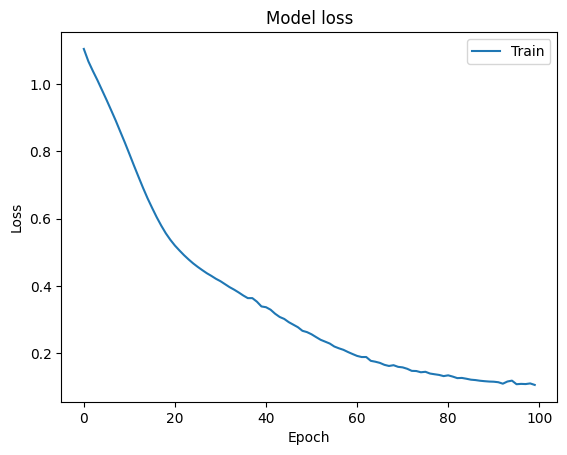

In [26]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


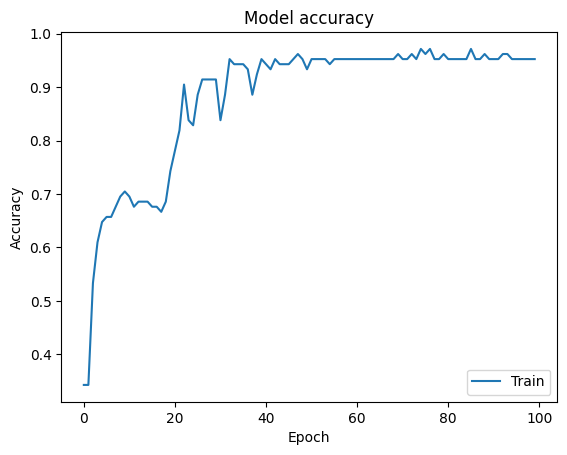

In [27]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

---
Sampai di sini, Anda sudah berhasil membuat model untuk menyelesaikan kasus multi kelas. Seperti pada gambar di atas, akurasi yang kita dapatkan kurang lebih 0.98 (98%), tetapi ini dapat berbeda setiap kali melatih model seperti yang telah kita bahas sebelumnya. Jadi jangan risau, ya.



---
Terakhir, kita perlu menguji akurasi prediksi dari model yang telah dibangun menggunakan data uji yang belum pernah dilihat.



In [23]:
model.evaluate(X_test, Y_test, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9915 - loss: 0.0962  


[0.07505320757627487, 0.9777777791023254]